In [2]:
import subprocess

In [3]:
import os
import pandas as pd
import scanpy as sc
from anndata import AnnData
import cello

In [4]:
GEO_DATASET_URL = 'ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3516nnn/GSM3516673/suppl/GSM3516673_MSK_LX682_NORMAL_dense.csv.gz'

subprocess.run('curl {} > GSM3516666_MSK_LX682_NORMAL_dense.csv.gz'.format(GEO_DATASET_URL), shell=True)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  1420k      0  0:00:07  0:00:07 --:--:-- 2409k


CompletedProcess(args='curl ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3516nnn/GSM3516673/suppl/GSM3516673_MSK_LX682_NORMAL_dense.csv.gz > GSM3516666_MSK_LX682_NORMAL_dense.csv.gz', returncode=0)

In [5]:
df = pd.read_csv("GSM3516666_MSK_LX682_NORMAL_dense.csv.gz", index_col=0)
adata = AnnData(df)

df

/home/chiara/anaconda3/envs/cello_env/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,TSPAN6,DPM1,SCYL3,C1ORF112,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RP11-24F11.5,RP5-958B11.1,WDFY4.1,RP11-244E17.1,RP11-57A19.7,RP11-419I17.1,RP3-454G6.2,AC013271.5,RP11-122G18.12,RP5-937E21.8
120703408789411,0,1,0,0,3,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120703408793835,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120703409145716,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120703409339181,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120703409379676,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241114576481206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241114577287974,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241114589031734,0,3,0,0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241114589096668,0,2,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)


In [7]:
sc.pp.pca(adata, n_comps=50)

In [8]:
sc.pp.neighbors(adata, n_neighbors=15)

In [22]:
sc.tl.leiden(adata, resolution=1.0)

In [10]:
cello_resource_loc = os.getcwd()
#cello_resource_loc = "../test_cello"

In [11]:
model_prefix = "GSM3516666_LX682_NORMAL" # <-- The trained model will be stored in a file called GSM3516666_LX682_NORMAL.model.dill 

cello.scanpy_cello(
    adata, 
    'leiden',
    cello_resource_loc, 
    out_prefix=model_prefix
)

Found CellO resources at '/home/chiara/Documents/Università/Git/CellO/resources'.
Checking if any pre-trained model is compatible with this input dataset...


/home/chiara/anaconda3/envs/cello_env/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/chiara/anaconda3/envs/cello_env/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Could not find compatible pre-trained model.
Found CellO resources at '/home/chiara/Documents/Università/Git/CellO/resources'.
Loading ontology...
Loading expression data from /home/chiara/Documents/Università/Git/CellO/resources/training_set/log_tpm.h5...
Loaded matrix of shape (4293, 58243)
done.
Inferred that input file uses HGNC gene symbols.
Of 18804 genes in the input file, 15754 were found in the training set of 58243 genes.
Training model...
Fitting PCA with 3000 components...
done.
Transforming with PCA...
done.
(1/317)
Training classifier for label CL:0000576...
Number of positive items: 314
Number of negative items: 3950
(2/317)
Training classifier for label CL:0002087...
Number of positive items: 2010
Number of negative items: 2267
(3/317)
Training classifier for label CL:2000001...
Number of positive items: 1575
Number of negative items: 2242
(4/317)
Training classifier for label CL:0000842...
Number of positive items: 2010
Number of negative items: 2267
(5/317)
Training c

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Transforming with PCA...
done.
Making predictions for each classifier...
Running solver on item 1/20...
Running solver on item 2/20...
Running solver on item 3/20...
Running solver on item 4/20...
Running solver on item 5/20...
Running solver on item 6/20...
Running solver on item 7/20...
Running solver on item 8/20...
Running solver on item 9/20...
Running solver on item 10/20...
Running solver on item 11/20...
Running solver on item 12/20...
Running solver on item 13/20...
Running solver on item 14/20...
Running solver on item 15/20...
Running solver on item 16/20...
Running solver on item 17/20...
Running solver on item 18/20...
Running solver on item 19/20...
Running solver on item 20/20...
Checking if any pre-trained model is compatible with this input dataset...


/home/chiara/anaconda3/envs/cello_env/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/chiara/anaconda3/envs/cello_env/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Of 18804 genes in the input file, 15754 were found in the training set of 58243 genes.
Of 18804 genes in the input file, 15402 were found in the training set of 31283 genes.
Using thresholds stored in /home/chiara/Documents/Università/Git/CellO/resources/trained_models/ir.10x_genes_thresholds.tsv
Binarizing classifications...
Mapping each sample to its predicted labels...
Computing the most-specific predicted labels...
Loading ontology...
Item 0 predicted to be "alveolar macrophage (CL:0000583)"
Item 1 predicted to be "effector memory CD4-positive, alpha-beta T cell (CL:0000905)"
Item 10 predicted to be "effector memory CD4-positive, alpha-beta T cell (CL:0000905)"
Item 11 predicted to be "effector memory CD4-positive, alpha-beta T cell (CL:0000905)"
Item 12 predicted to be "central memory CD4-positive, alpha-beta T cell (CL:0000904)"
Item 13 predicted to be "type II pneumocyte (CL:0002063)"
Item 14 predicted to be "epithelial cell of upper respiratory tract (CL:0002631)"
Item 15 predi

/home/chiara/anaconda3/envs/cello_env/lib/python3.7/site-packages/cello/scanpy_cello.py:211: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs['Most specific cell type'] = ms_results_df['most_specific_cell_type']


In [12]:
sc.tl.umap(adata)

/home/chiara/anaconda3/envs/cello_env/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Most specific cell type' as categorical


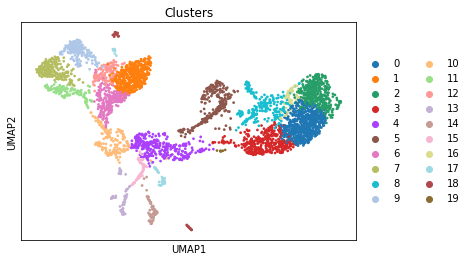

In [13]:
fig = sc.pl.umap(adata, color='leiden', title='Clusters', return_fig=True)

In [14]:
out_file = 'clusters_under_clustered.pdf' # <-- Name of the output file

fig.savefig(out_file, bbox_inches='tight', format='pdf')

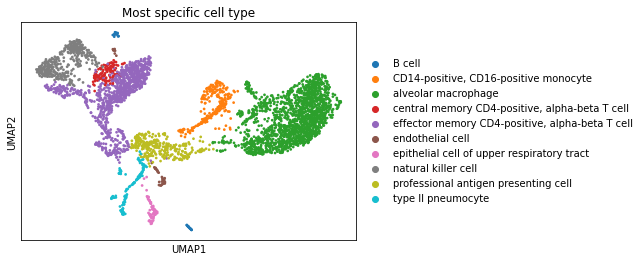

In [15]:
fig = sc.pl.umap(adata, color='Most specific cell type', return_fig=True)

In [16]:
out_file = 'specific_cell_types.pdf' # <-- Name of the output file

fig.savefig(out_file, bbox_inches='tight', format='pdf')

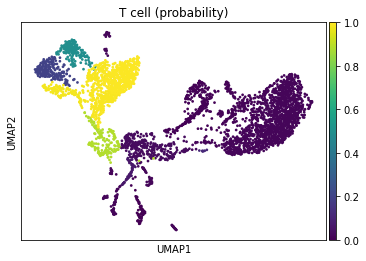

In [17]:
fig = sc.pl.umap(adata, color='T cell (probability)', vmin=0.0, vmax=1.0, return_fig=True)

In [18]:
out_file = 'T_cell_probability.pdf' # <-- Name of the output file

fig.savefig(out_file, bbox_inches='tight', format='pdf')

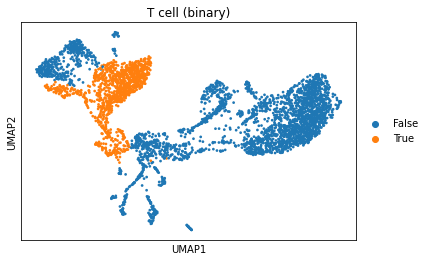

In [19]:
fig = sc.pl.umap(adata, color='T cell (binary)', return_fig=True)

In [20]:
out_file = 'T_cell_binary.pdf' # <-- Name of the output file

fig.savefig(out_file, bbox_inches='tight', format='pdf')

In [ ]:
out_file = 'probs_on_graph.png' # <--- Name of the output file

fig.savefig(out_file, format='png', dpi=300)